In [1]:
import os
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch import optim
import torch.nn.functional as torch_function
from torchvision import datasets, transforms, models
from torch.autograd import Variable
from glob import glob
from torch.utils.data import DataLoader, Dataset
from PIL import Image
from torchvision.utils import save_image

In [2]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

class DenoiseDataset(Dataset):
    def __init__(self, noisy_root, pure_root, transform=None):
        self.noisy_root = noisy_root
        self.pure_root = pure_root
        self.transform = transform

        self.samples = []
        self.classes = sorted(os.listdir(noisy_root))
        self.class_to_idx = {cls: i for i, cls in enumerate(self.classes)}

        for cls in self.classes:
            noisy_class_dir = os.path.join(noisy_root, cls)
            pure_class_dir = os.path.join(pure_root, cls)
            files = os.listdir(noisy_class_dir)

            for fname in files:
                noisy_path = os.path.join(noisy_class_dir, fname)
                pure_path = os.path.join(pure_class_dir, fname)
                self.samples.append((noisy_path, pure_path, self.class_to_idx[cls]))

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        noisy_path, pure_path, label = self.samples[idx]

        noisy_img = Image.open(noisy_path).convert("RGB")
        pure_img = Image.open(pure_path).convert("RGB")

        if self.transform:
            noisy_img = self.transform(noisy_img)
            pure_img = self.transform(pure_img)

        return noisy_img, pure_img, label


train_dataset = DenoiseDataset(
    noisy_root="C:/Users/satyasrp/personal/projects/aiml/neural_networks/data/PlantVillage_Noisy_Dataset/PlantVillage/Noisy_Dataset/Train_Data",
    pure_root="C:/Users/satyasrp/personal/projects/aiml/neural_networks/data/PlantVillage_Noisy_Dataset/PlantVillage/Pure_Dataset/Train_Data",
    transform=transform
)

test_dataset = DenoiseDataset(
    noisy_root="C:/Users/satyasrp/personal/projects/aiml/neural_networks/data/PlantVillage_Noisy_Dataset/PlantVillage/Noisy_Dataset/Test_Data",
    pure_root="C:/Users/satyasrp/personal/projects/aiml/neural_networks/data/PlantVillage_Noisy_Dataset/PlantVillage/Pure_Dataset/Test_Data",
    transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
# class AlexNetAutoencoder(nn.Module):
#     def __init__(self, num_classes=1000):
#         super(AlexNetAutoencoder, self).__init__()

#         self.features = nn.Sequential(
#             nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4, padding=2),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=3, stride=2),

#             nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride=1),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=3, stride=2),

#             nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(inplace=True),

#             nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(inplace=True),
            
#             nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1),
#             nn.ReLU(inplace=True),
#             nn.MaxPool2d(kernel_size=3, stride=2)
#         )

#         self.classifier = nn.Sequential(
#             nn.Dropout(),
#             nn.Linear(256 * 3 * 3, 4096),
#             nn.ReLU(inplace=True),

#             nn.Dropout(),
#             nn.Linear(4096, 4096),
#             nn.ReLU(inplace=True),

#             nn.Linear(4096, num_classes),
#         )
#         self._initialize_fc()
    
#     def _initialize_fc(self):
#         with torch.no_grad():
#             x = torch.zeros(1, 3, 128, 128)
#             feat = self.features(x)
#             flatten_dim = feat.shape[1] * feat.shape[2] * feat.shape[3]

#         self.classifier[1] = nn.Linear(flatten_dim, 4096)

#     def forward(self, X):
#         X = self.features(X)
#         X = torch.flatten(X, 1)
#         X = self.classifier(X)

#         return X

# model = AlexNetAutoencoder(num_classes=10)
# print(model)

# X = torch.randn(1, 3, 128, 128)
# out = model(X)
# print("Output shape:", out.shape)


AlexNetAutoencoder(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=1024, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, inpla

In [24]:
import torch
import torch.nn as nn

class AlexNetAutoencoder(nn.Module):
    def __init__(self):
        super(AlexNetAutoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, stride=2),

            nn.Conv2d(96, 256, kernel_size=5, stride=1, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, stride=2),

            nn.Conv2d(256, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(384, 384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(384, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 384, kernel_size=3, stride=2),   
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.ConvTranspose2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Upsample(size=(15, 15), mode='bilinear', align_corners=False),
            nn.Conv2d(256, 96, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Upsample(size=(31, 31), mode='bilinear', align_corners=False),
            nn.Conv2d(96, 96, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Upsample(size=(128, 128), mode='bilinear', align_corners=False),
            nn.Conv2d(96, 3, kernel_size=3, padding=1),
            nn.Sigmoid()
        )


    def forward(self, x):
        z = self.encoder(x)
        out = self.decoder(z)
        return out

model = AlexNetAutoencoder()
x = torch.randn(1, 3, 128, 128)
out = model(x)
print("Input shape :", x.shape)
print("Output shape:", out.shape)


Input shape : torch.Size([1, 3, 128, 128])
Output shape: torch.Size([1, 3, 128, 128])


In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = AlexNetAutoencoder().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

num_epochs = 10
train_losses, val_losses = [], []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for noisy_imgs, pure_imgs, _ in train_loader:
        noisy_imgs, pure_imgs = noisy_imgs.to(device), pure_imgs.to(device)

        optimizer.zero_grad()
        outputs = model(noisy_imgs)
        loss = criterion(outputs, pure_imgs)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * noisy_imgs.size(0)

    train_loss /= len(train_loader.dataset)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for noisy_imgs, pure_imgs, _ in test_loader:
            noisy_imgs, pure_imgs = noisy_imgs.to(device), pure_imgs.to(device)
            outputs = model(noisy_imgs)
            loss = criterion(outputs, pure_imgs)
            val_loss += loss.item() * noisy_imgs.size(0)

    val_loss /= len(test_loader.dataset)
    val_losses.append(val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")


Using device: cuda
Epoch [1/10] Train Loss: 0.0323 | Val Loss: 0.0273
Epoch [2/10] Train Loss: 0.0266 | Val Loss: 0.0207
Epoch [3/10] Train Loss: 0.0186 | Val Loss: 0.0165
Epoch [4/10] Train Loss: 0.0151 | Val Loss: 0.0130
Epoch [5/10] Train Loss: 0.0134 | Val Loss: 0.0118
Epoch [6/10] Train Loss: 0.0122 | Val Loss: 0.0108
Epoch [7/10] Train Loss: 0.0112 | Val Loss: 0.0101
Epoch [8/10] Train Loss: 0.0105 | Val Loss: 0.0102
Epoch [9/10] Train Loss: 0.0100 | Val Loss: 0.0098
Epoch [10/10] Train Loss: 0.0096 | Val Loss: 0.0091


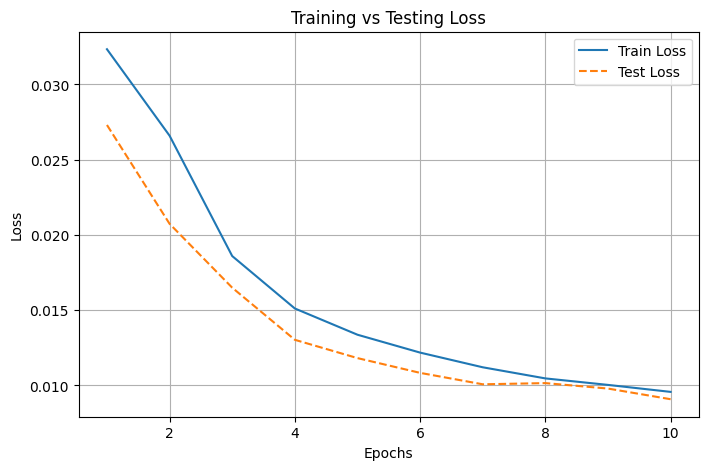

In [32]:
plt.figure(figsize=(8,5))
plt.plot(range(1, num_epochs+1), train_losses, label="Train Loss")
plt.plot(range(1, num_epochs+1), val_losses, label="Test Loss", linestyle="--")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Testing Loss")
plt.legend()
plt.grid(True)
plt.show()

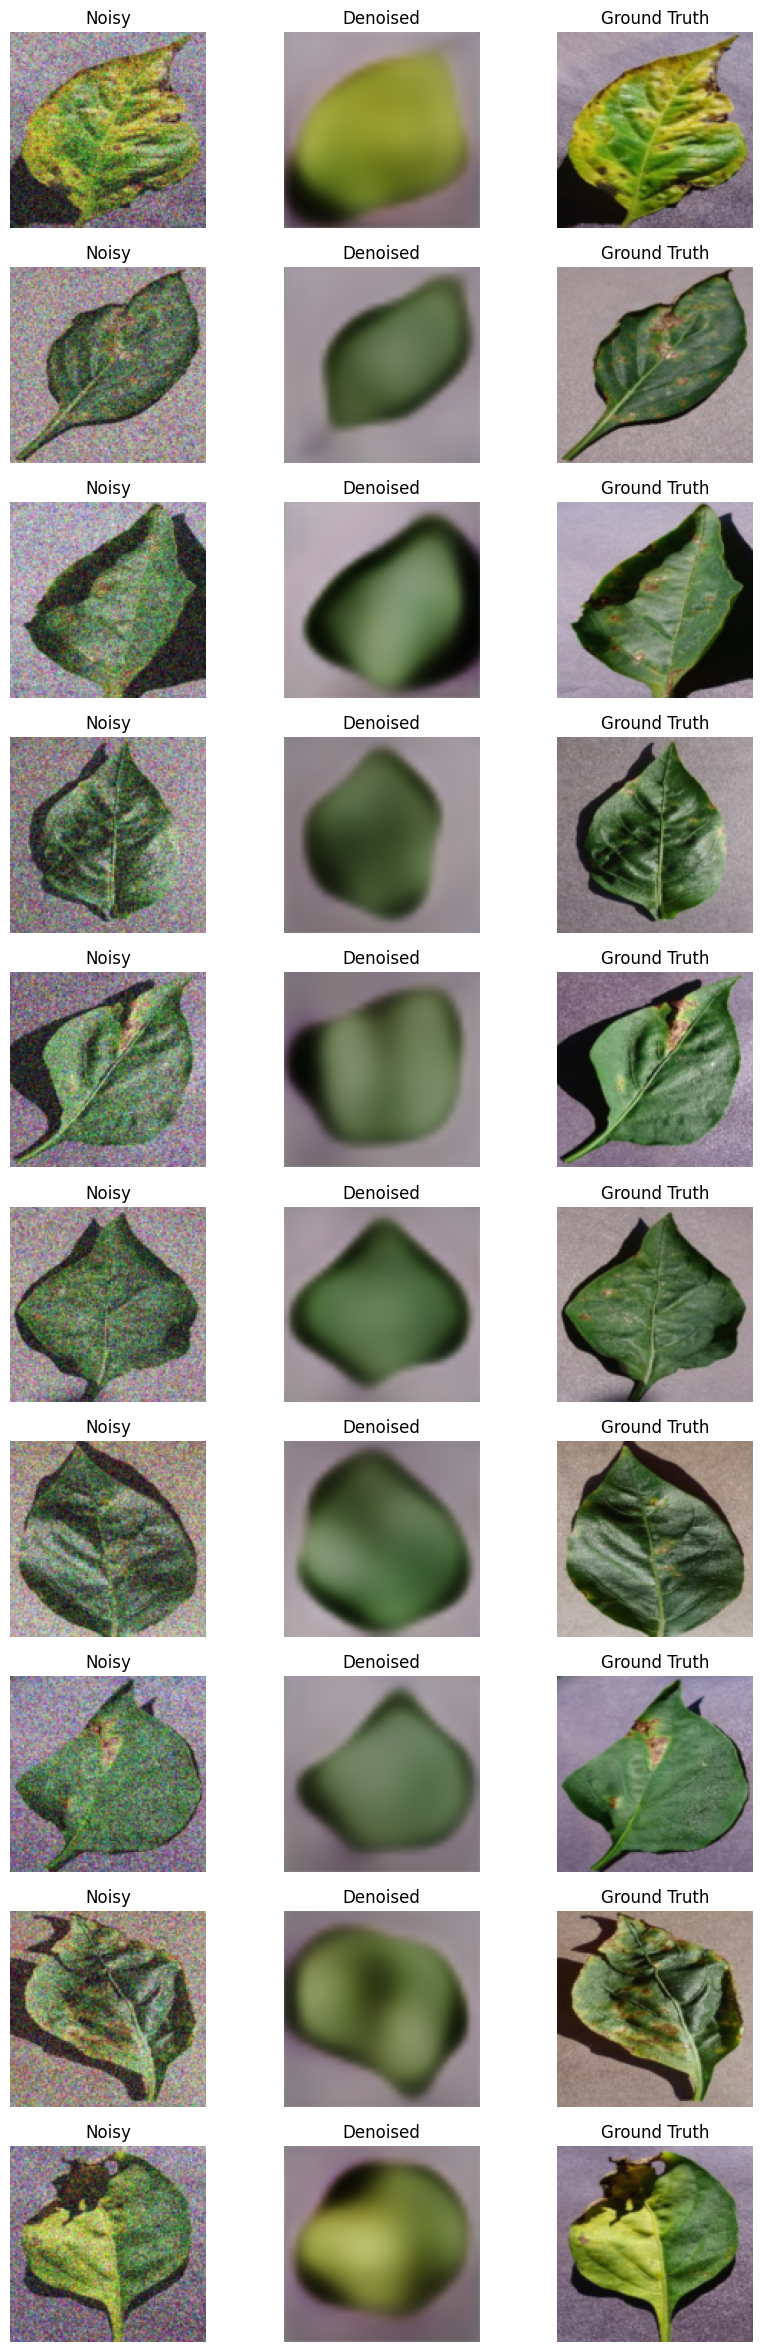

In [33]:
import matplotlib.pyplot as plt

def show_denoised_results(model, dataloader, n=5):
    model.eval()
    noisy_imgs, pure_imgs, _ = next(iter(dataloader))
    noisy_imgs, pure_imgs = noisy_imgs[:n].to(device), pure_imgs[:n].to(device)

    with torch.no_grad():
        outputs = model(noisy_imgs)

    noisy_imgs = noisy_imgs.cpu().permute(0,2,3,1).numpy()
    pure_imgs = pure_imgs.cpu().permute(0,2,3,1).numpy()
    outputs = outputs.cpu().permute(0,2,3,1).numpy()

    fig, axs = plt.subplots(n, 3, figsize=(10, 3*n))
    for i in range(n):
        axs[i,0].imshow(noisy_imgs[i]); axs[i,0].set_title("Noisy"); axs[i,0].axis("off")
        axs[i,1].imshow(outputs[i]);    axs[i,1].set_title("Denoised"); axs[i,1].axis("off")
        axs[i,2].imshow(pure_imgs[i]); axs[i,2].set_title("Ground Truth"); axs[i,2].axis("off")
    plt.show()

show_denoised_results(model, test_loader, n=10)
